In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# load local version of gallifrey, before pip installed version, for debugging
import pathlib
import sys
import os

sys.path.append(str(pathlib.Path(os.getcwd()).parent.joinpath("src")))

In [3]:
import yt
import numpy as np
import matplotlib.pyplot as plt

from gallifrey.model import Model
from gallifrey.particles import rotated_dataset

from yt_maps import plot_component_maps

## DATA SETUP

In [5]:
snapshot = 127
resolution = 8192
sim_id = "37_11"

In [6]:
model = Model(
    snapshot=snapshot,
    resolution=resolution,
    sim_id=sim_id,
)
ds = model.ds
mw = model.halo


      DETECTED LOCAL MACHINE: Test snapshot loaded.


      CONFIG: Setting resolution to 4096.


      CONFIG: Setting snapshot to 127.


      CONFIG: Setting sim_id to 09_18.

yt : [INFO     ] 2023-10-17 15:06:03,853 Calculating time from 1.000e+00 to be 4.318e+17 seconds
yt : [INFO     ] 2023-10-17 15:06:03,911 Parameters: current_time              = 4.318436660023809e+17 s
yt : [INFO     ] 2023-10-17 15:06:03,912 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-10-17 15:06:03,913 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-10-17 15:06:03,914 Parameters: domain_right_edge         = [100. 100. 100.]
yt : [INFO     ] 2023-10-17 15:06:03,914 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-10-17 15:06:03,914 Parameters: current_redshift          = 4.440892098500626e-16
yt : [INFO     ] 2023-10-17 15:06:03,915 Parameters: omega_lambda              = 0.682
yt : [INFO     ] 2023-10-17 15:06:03,915 Parameters: omega_matter 

## PLOT SETUP

In [7]:
figure_subdirectory = f"MilkyWayAnalogue/{model.resolution}/{model.sim_id}/{model.snapshot}/Galaxy_component_maps"
save = True

## CREATE DATA SOURCE

In [8]:
radius = 0.2 * mw.virial_radius()
normal_vector = mw.normal_vector("stars", data=mw.sphere(radius=(10, "kpc")))

In [9]:
sphere_data = mw.sphere(radius=radius)
rotated_data = {
    component: rotated_dataset(
        sphere_data,
        mw.centre(),
        normal_vector,
        [
            (f"{component}_stars", "total_number"),
        ],
        bounding_box=[
            [-ds.domain_width[0].to("kpc") / 2, ds.domain_width[0].to("kpc") / 2]
        ]
        * 3,
    )
    for component in ["bulge", "thin_disk", "thick_disk", "halo", "galaxy"]
}

yt : [INFO     ] 2023-10-17 15:06:23,134 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-10-17 15:06:23,135 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-10-17 15:06:23,136 Parameters: domain_left_edge          = [-73778.96826036 -73778.96826036 -73778.96826036]
yt : [INFO     ] 2023-10-17 15:06:23,136 Parameters: domain_right_edge         = [73778.96826036 73778.96826036 73778.96826036]
yt : [INFO     ] 2023-10-17 15:06:23,137 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-10-17 15:06:23,138 Allocating for 9.985e+04 particles
yt : [INFO     ] 2023-10-17 15:06:24,633 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-10-17 15:06:24,634 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-10-17 15:06:24,634 Parameters: domain_left_edge          = [-73778.96826036 -73778.96826036 -73778.96826036]
yt : [INFO     ] 2023-10-17 15:06:24,635 Parameters: domain_right_edge         = [73778.96826036 73778.

## PLOT MAPS

yt : [INFO     ] 2023-10-17 15:06:29,241 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-10-17 15:06:29,242 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-10-17 15:06:29,244 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-10-17 15:06:29,245 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-10-17 15:06:29,248 Splatting (('bulge_stars', 'total_number')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-10-17 15:06:30,921 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-10-17 15:06:30,921 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-10-17 15:06:30,923 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-10-17 15:06:30,923 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-10-17 15:06:30,925 Splatting (('thin_disk_stars', 'total_number')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-10-17 15:06:32,121 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-10-17 15:06:32,121 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-10-17 15:06:32,123 xlim = -21.

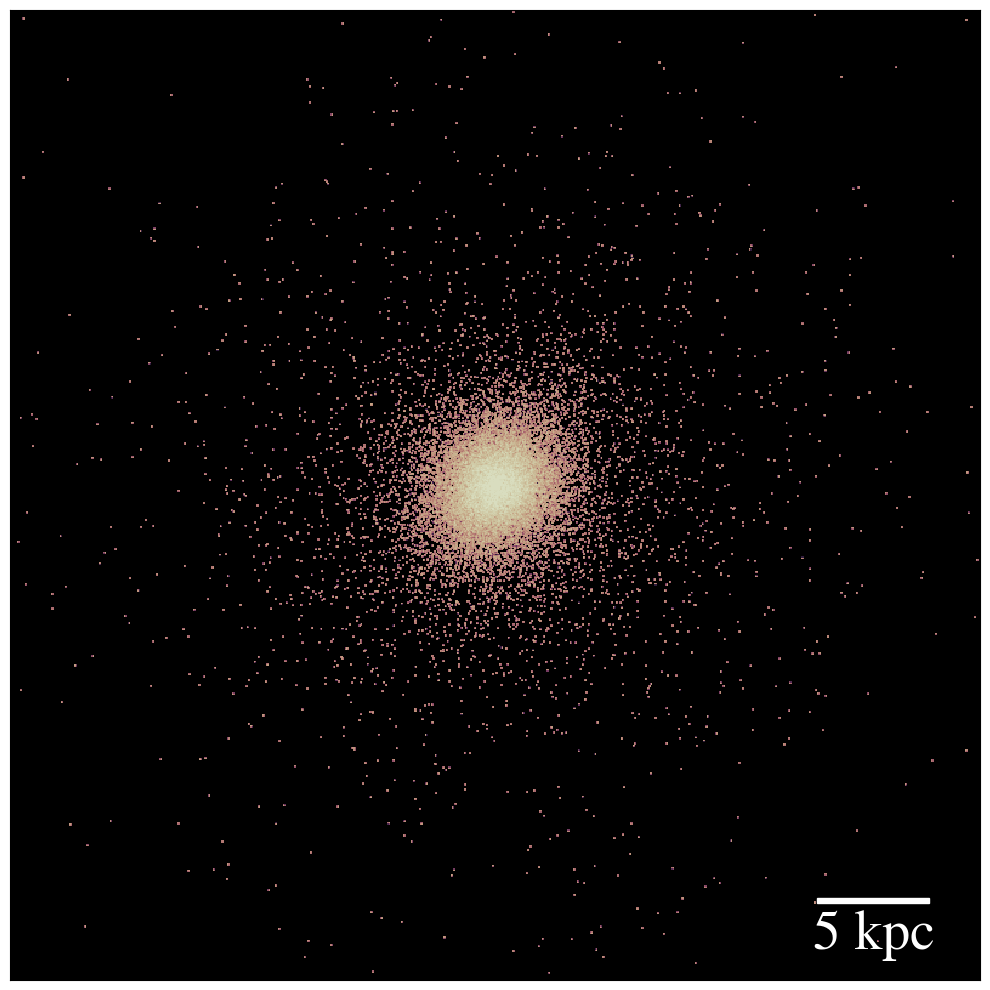

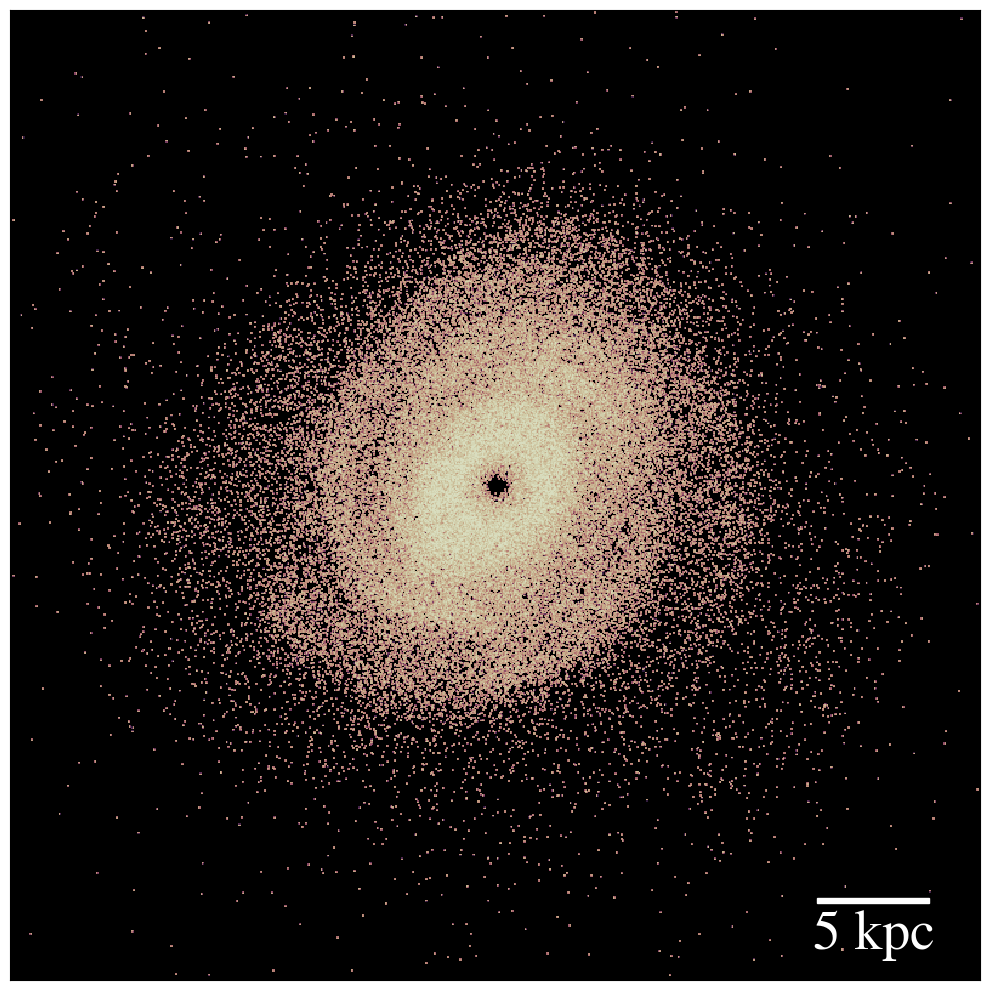

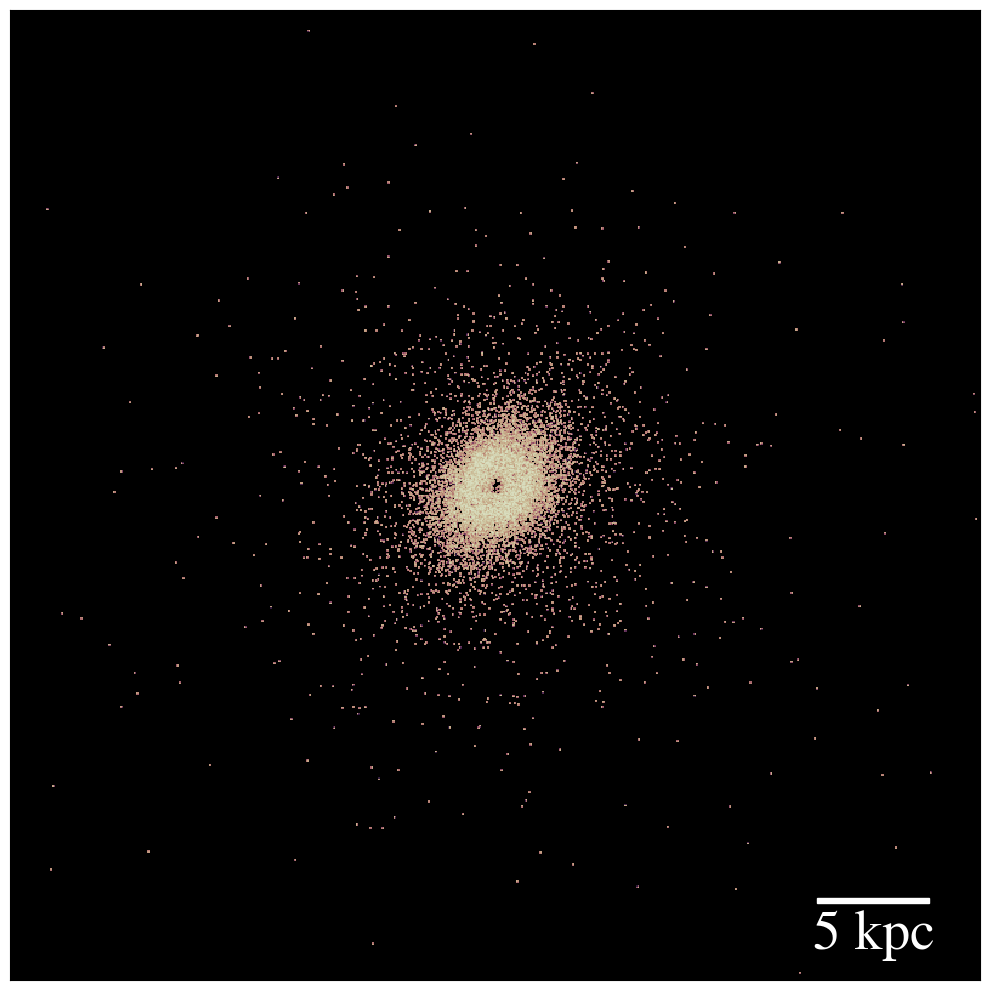

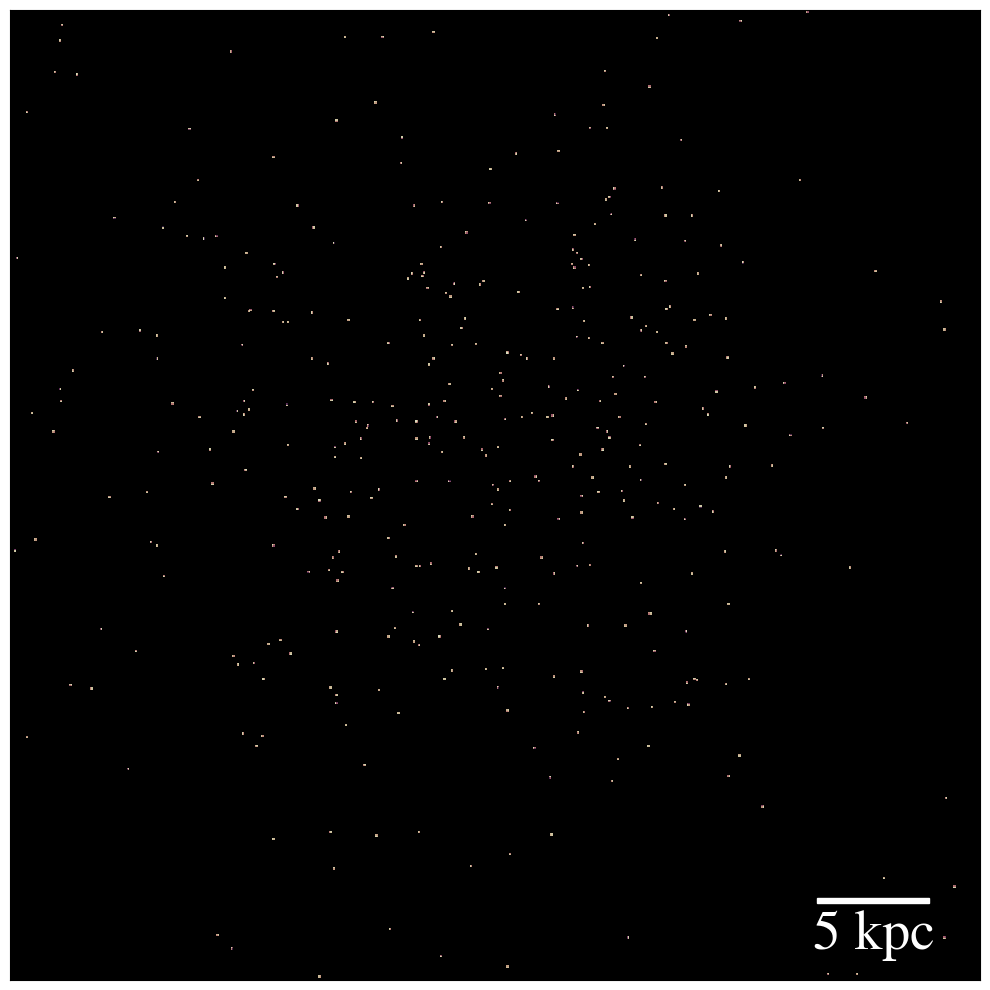

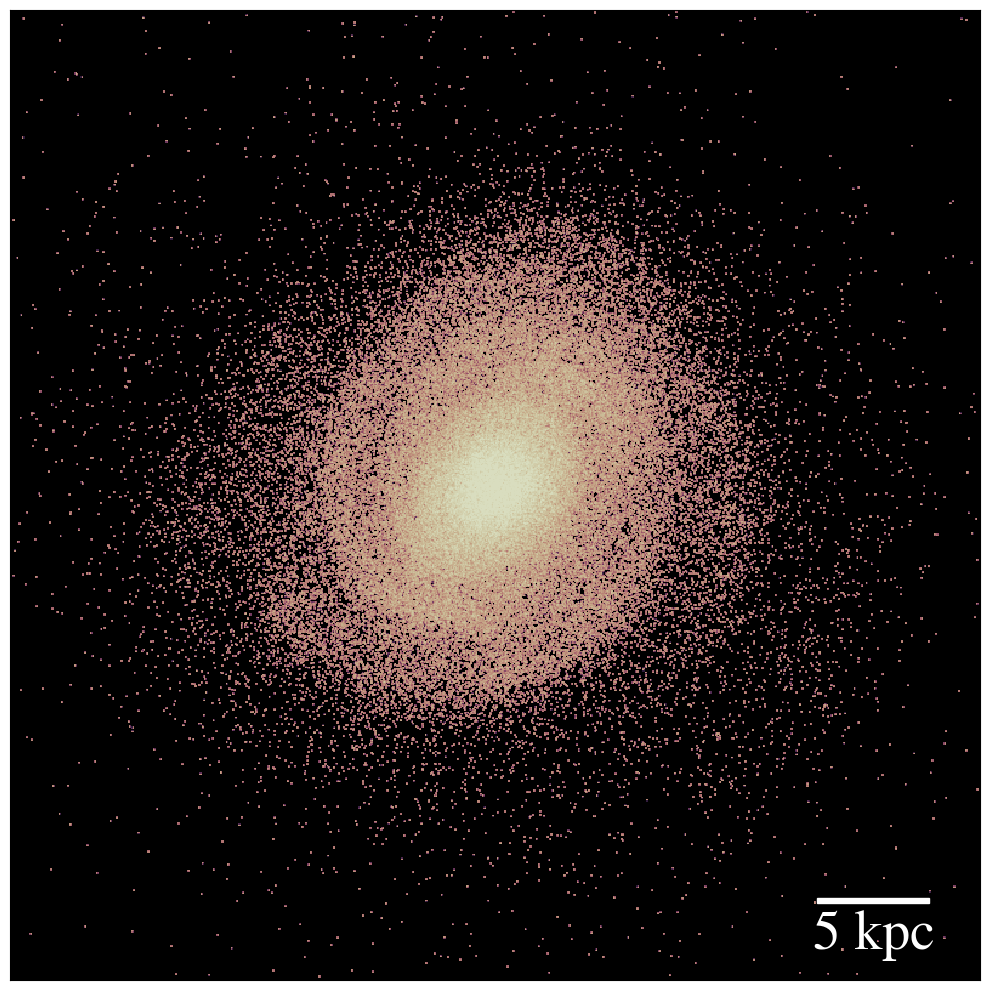

In [10]:
plots, figs = plot_component_maps(
    galaxy_component_data=rotated_data,
    normal="z",
    save=save,
    hide_colorbar=True,
    hide_axes=True,
    figure_subdirectory=figure_subdirectory,
)

yt : [INFO     ] 2023-10-17 15:06:36,933 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-10-17 15:06:36,934 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-10-17 15:06:36,935 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-10-17 15:06:36,936 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-10-17 15:06:36,936 Splatting (('bulge_stars', 'total_number')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-10-17 15:06:38,124 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-10-17 15:06:38,124 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-10-17 15:06:38,126 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-10-17 15:06:38,126 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-10-17 15:06:38,127 Splatting (('thin_disk_stars', 'total_number')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-10-17 15:06:39,300 xlim = -21.650000 21.650000
yt : [INFO     ] 2023-10-17 15:06:39,300 ylim = -21.650000 21.650000
yt : [INFO     ] 2023-10-17 15:06:39,302 xlim = -21.

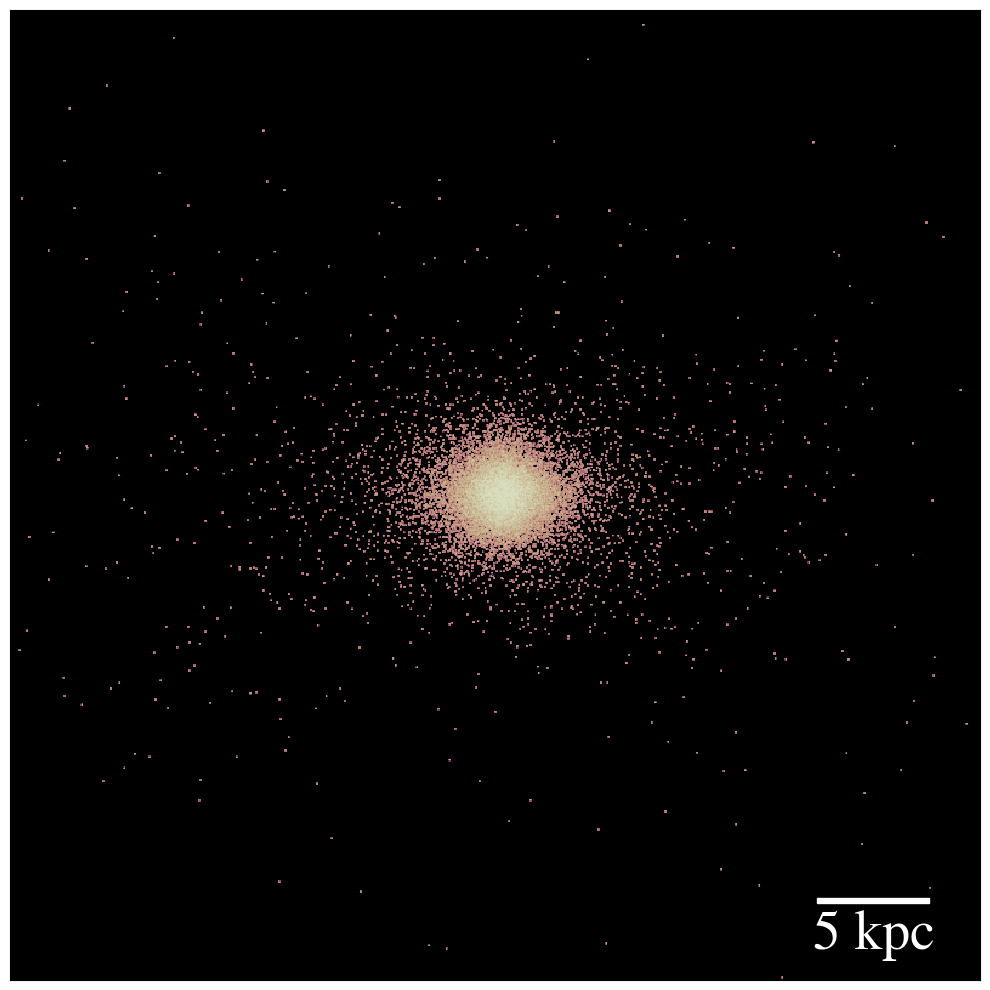

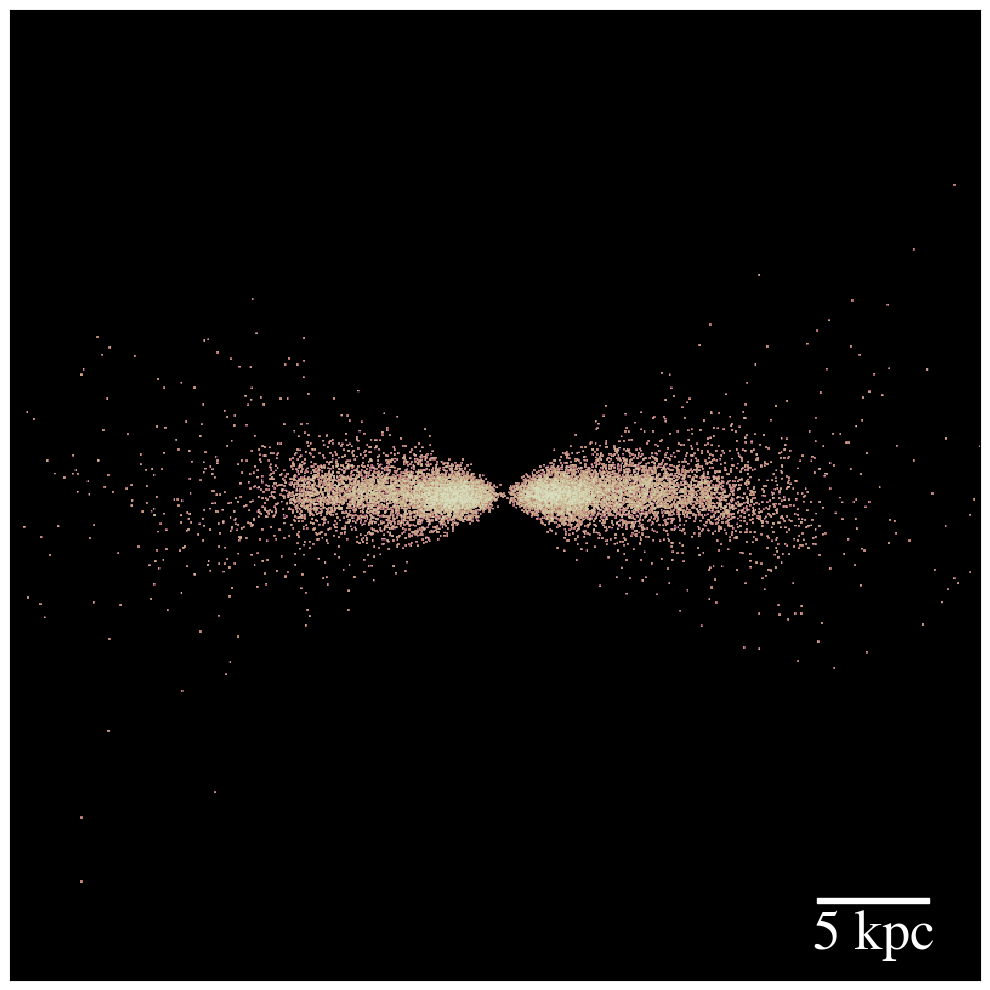

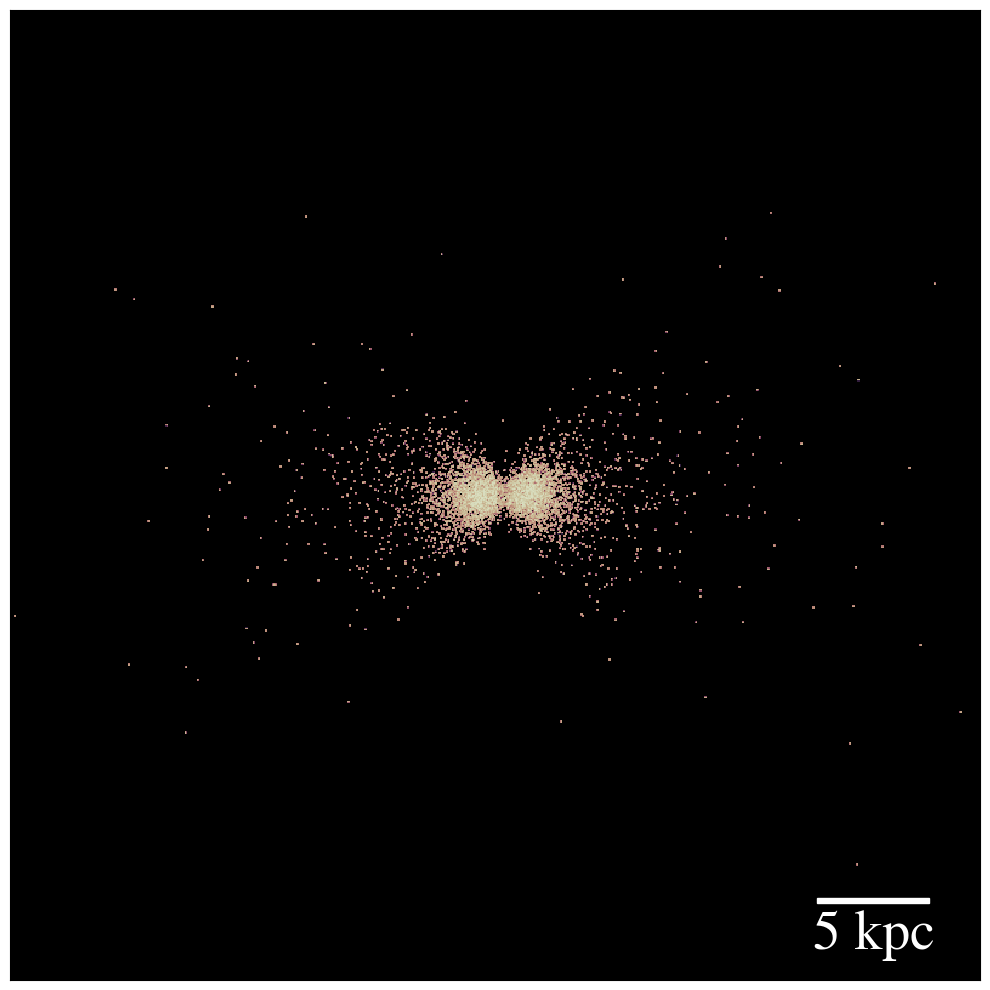

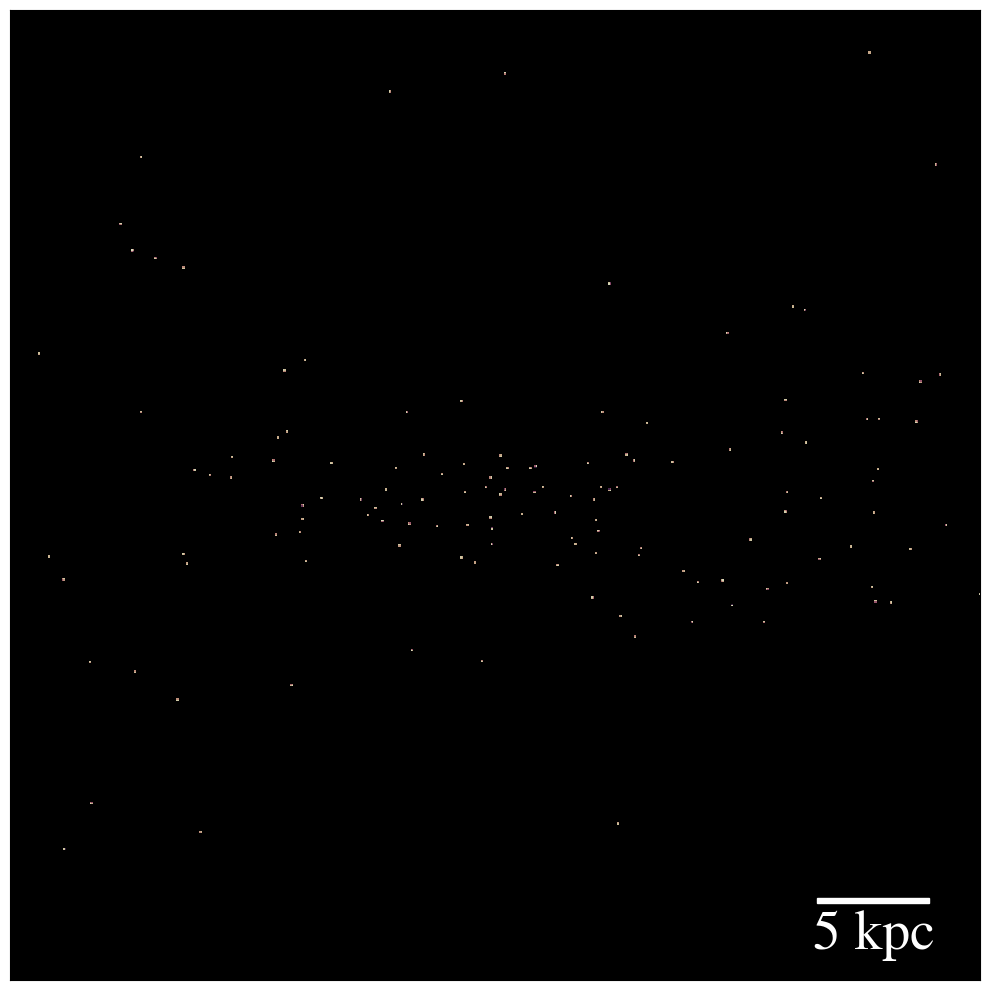

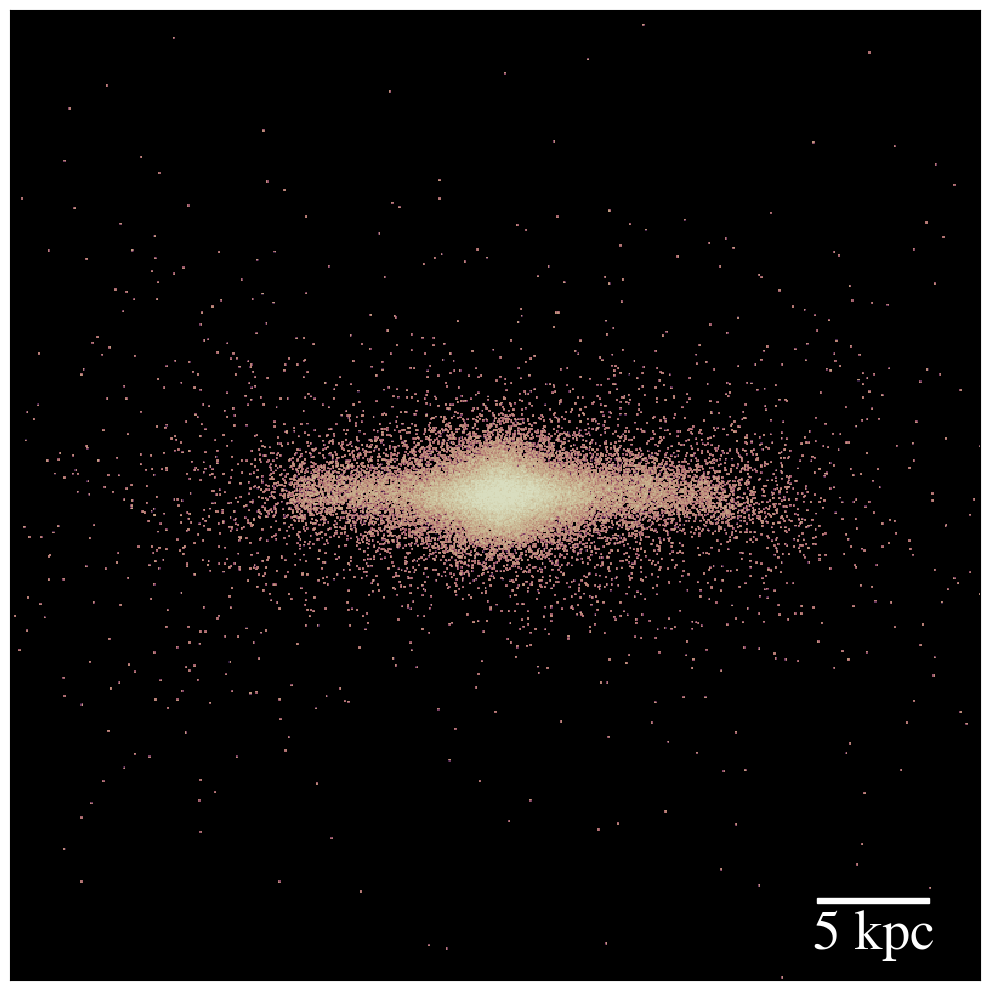

In [11]:
plots, figs = plot_component_maps(
    galaxy_component_data=rotated_data,
    normal="x",
    save=save,
    hide_colorbar=True,
    hide_axes=True,
    figure_subdirectory=figure_subdirectory,
)